# <span style="color:Red">Car Price Predictor</span>

 Students: Maria DeMelo (199695520), Emma Ude(199697810)

### <span >Introduction</span>
We have decided to predict the sales price of vehicles based on their year, brand, model, etc. It is always import for car dealerships to be able to predict pricing trends for cars depending on where they are and what type of car it is as this helps them to maximize profit.

Because we have changed our dataset and objective, this week we will focus is both visualizing and training the dataset training the dataset. We will split the data into test and training data and prepare it and try various regression models to train the data and compare their RMSE scores.

Please note: we changed our previous dataset. We noticed in the previous week's progress that there was no real correlation between the attributes in the Walmart dataset. We are able to fundamentally understand the problem we are trying to solve better using this dateset.

### <span >Dataset Description</span>

An ideal ML algorithm will predict the price accurately and ingest factors like years, brand, model, mileage, etc.

US Cars'data was scraped from AUCTION EXPORT.com. This dataset included Information about 28 brands of clean and used vehicles for sale in US. Twelve features were assembled for each car in the dataset.

### <span >Attribute Information</span>
<ol>
    <li>Price - The sale price of the vehicle in the ad</li>
    <li>Years -The vehicle registration year</li>
<li>Brand - The brand of car</li>
<li>Model - model of the vehicle</li>
    <li>Color - The color of car</li>
<li>State - The location in which the car is being available for purchase</li>
<li>Milage - miles traveled by vehicle</li>
<li>VIN – The vehicle identification number is a collection of 17 characters (digits and capital letters)</li>
<li>Title status -This feature included binary classification, which are clean title vehicles and salvage insurance</li>
<li>Lot - A lot number is an identification number assigned to a particular quantity or lot of material from a single manufacturer.For cars, a lot number is combined with a serial number to form the Vehicle Identification Number.</li>
    <li>Condition - Time</li>
</ol>

### <span>Acknowledgements</span>
The dataset, description, and attribute information are all gotten from Kaggle.

# <span>Loading the Dataset and Printing out the first 5 records in the dataset</span>

In [89]:
import pandas as pd

#dropping irrelevant columns
cars=pd.read_csv("~/Desktop/CarPrediction_final/USA_cars_datasets.csv")
cars = cars.drop("condition", axis=1)
cars = cars.drop("vin", axis=1)
cars = cars.drop("lot", axis=1)
cars = cars.drop("country", axis=1)
cars = cars.drop("title_status", axis=1)
cars = cars.drop("Unnamed: 0", axis=1)
cars['model'] = cars['brand'] +" " +cars['model']
cars.to_csv('~/Desktop/CarPrediction_final/Cleaned_Car_data.csv')
cars.head()

,price,brand,model,year,mileage,color,state
0,6300,toyota,toyota cruiser,2008,274117.0,black,new jersey
1,2899,ford,ford se,2011,190552.0,silver,tennessee
2,5350,dodge,dodge mpv,2018,39590.0,silver,georgia
3,25000,ford,ford door,2014,64146.0,blue,virginia
4,27700,chevrolet,chevrolet 1500,2018,6654.0,red,florida


# <span >Printing description of the Data Set</span>

In [90]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    2499 non-null   int64  
 1   brand    2499 non-null   object 
 2   model    2499 non-null   object 
 3   year     2499 non-null   int64  
 4   mileage  2499 non-null   float64
 5   color    2499 non-null   object 
 6   state    2499 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 136.8+ KB


# <span >Printing the distinct value of Categorical Attributes and graphing.</span>

Note: Did not print models as there are too many

ford               1235
dodge               432
nissan              312
chevrolet           297
gmc                  42
jeep                 30
chrysler             18
bmw                  17
hyundai              15
kia                  13
buick                13
infiniti             12
honda                12
cadillac             10
mercedes-benz        10
heartland             5
land                  4
peterbilt             4
audi                  4
acura                 3
lincoln               2
lexus                 2
mazda                 2
maserati              1
toyota                1
harley-davidson       1
jaguar                1
ram                   1
Name: brand, dtype: int64

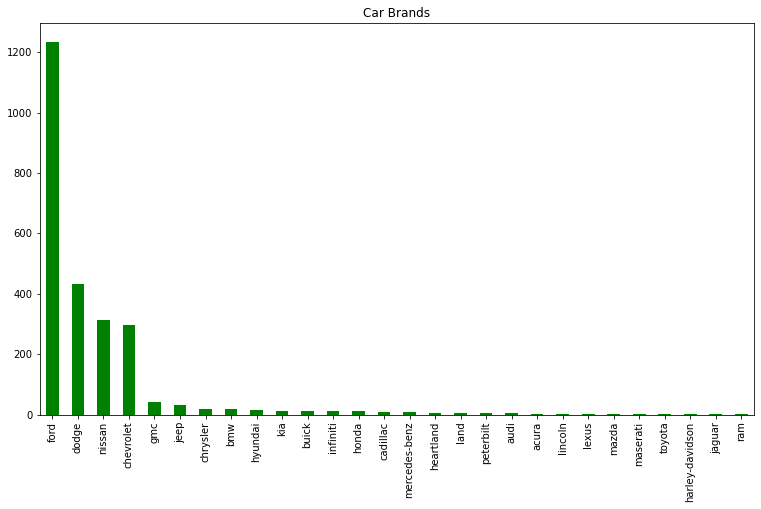

In [91]:
import matplotlib.pyplot as plt


cars["brand"].value_counts().plot(kind='bar',figsize=(12.8,7.2), color='green',title='Car Brands')
cars["brand"].value_counts()

white                                      707
black                                      516
gray                                       395
silver                                     300
red                                        192
blue                                       151
no_color                                    61
green                                       24
orange                                      20
gold                                        19
charcoal                                    18
brown                                       15
yellow                                       9
magnetic metallic                            6
shadow black                                 5
color:                                       5
beige                                        5
oxford white                                 4
ingot silver metallic                        4
super black                                  3
billet silver metallic clearcoat             3
triple yellow

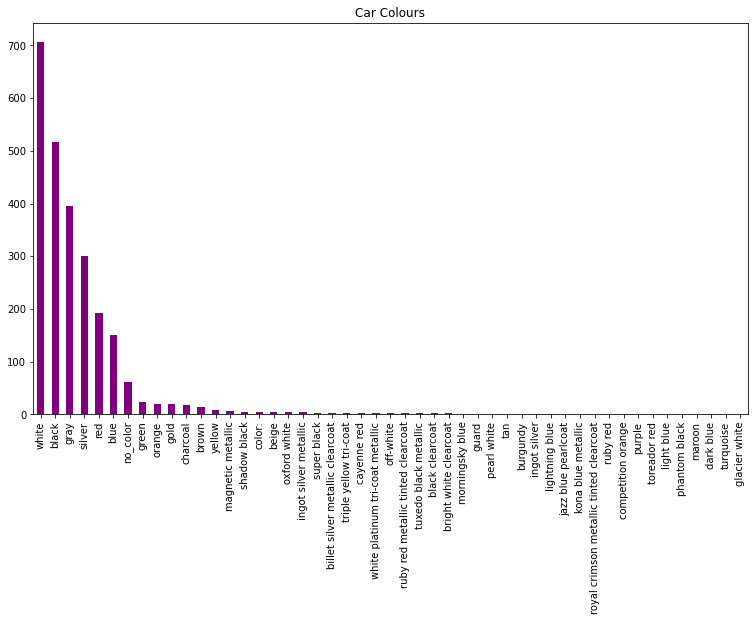

In [92]:
cars["color"].value_counts().plot(kind='bar',figsize=(12.8,7.2), color='purple',title='Car Colours')
cars["color"].value_counts()

pennsylvania      299
florida           246
texas             214
california        190
michigan          169
north carolina    146
minnesota         119
illinois          113
wisconsin          94
virginia           90
new jersey         87
nevada             85
oklahoma           71
south carolina     64
new york           58
georgia            51
missouri           46
arizona            33
ohio               31
massachusetts      27
oregon             27
tennessee          26
connecticut        25
mississippi        24
colorado           21
west virginia      21
alabama            17
washington         14
indiana            14
arkansas           12
louisiana          11
utah               10
kentucky            9
ontario             7
kansas              4
maryland            4
nebraska            4
new mexico          4
new hampshire       4
rhode island        2
idaho               2
vermont             2
wyoming             1
montana             1
Name: state, dtype: int64

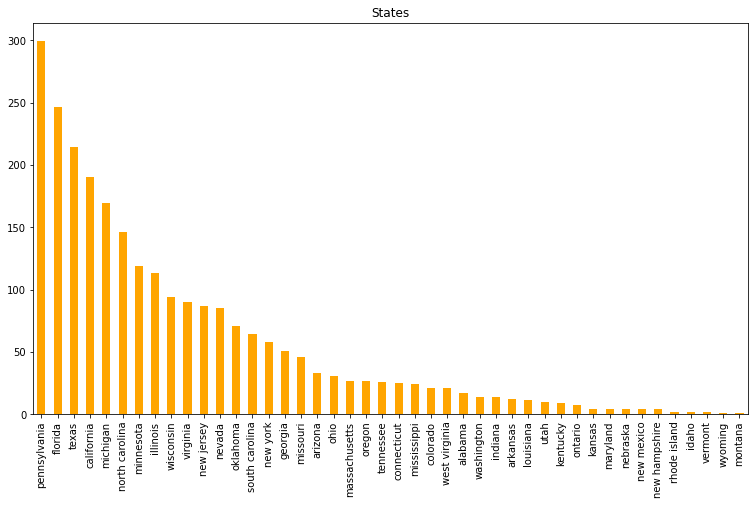

In [93]:

cars["state"].value_counts().plot(kind='bar',figsize=(12.8,7.2), color='orange',title='States')
cars["state"].value_counts()




# <span>Printing summary of Numerical Attributes</span>

In [94]:
cars.describe()

,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


# <span >Plot a graph for numerical attributes.</span>

<AxesSubplot:title={'center':'Year'}>

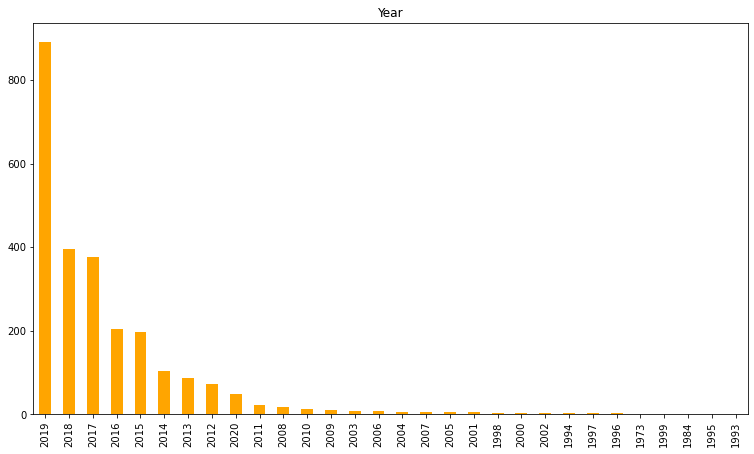

In [95]:
cars["year"].value_counts().plot(kind='bar',figsize=(12.8,7.2), color='orange',title='Year')

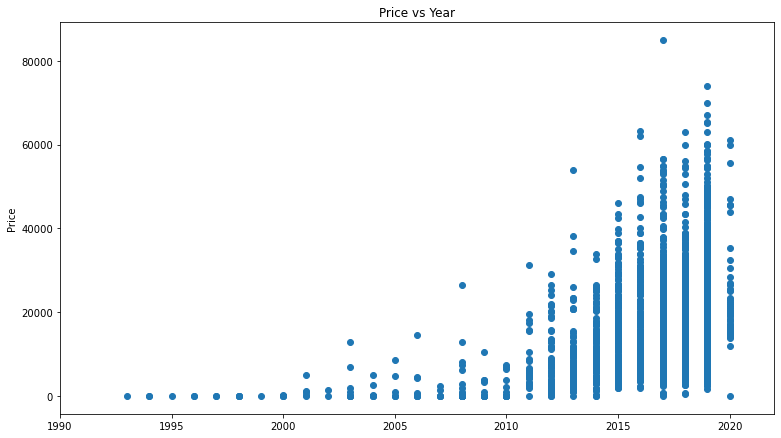

In [96]:
import matplotlib.pyplot as plot
plot.figure(figsize=(12.8,7.2))
plot.scatter(cars['year'],cars['price'])
plot.ylabel("Price")
plot.ylabel("Price")
plot.title("Price vs Year")
plot.xlim([1990,2022])
plot.show()

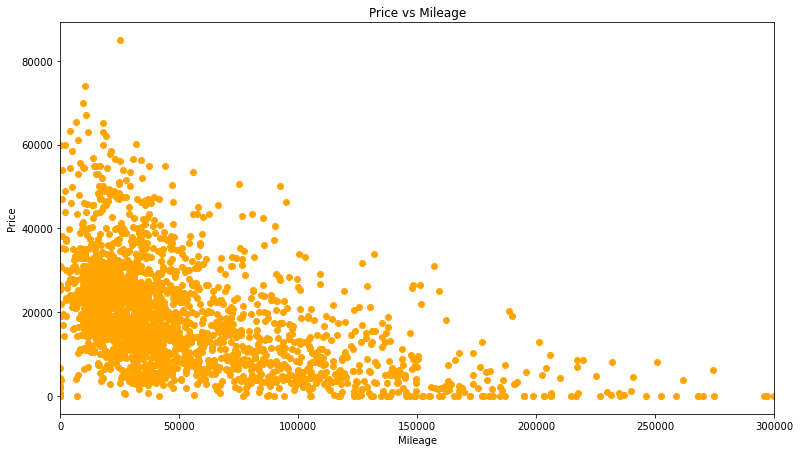

In [97]:

plot.figure(figsize=(12.8,7.2))
plot.scatter(cars['mileage'],cars['price'],color="orange")
plot.xlabel("Mileage")
plot.ylabel("Price")
plot.title("Price vs Mileage")
plot.xlim([0,300000])
plot.show()






# <span>Check for missing values</span>

Since no missing values no need to use SimpleImputer

In [98]:
print("Any missing values for brand?", cars["brand"].isnull().values.any())
print("Any missing values for model?",cars["model"].isnull().values.any())
print("Any missing values for model?",cars["year"].isnull().values.any())
print("Any missing values for model?",cars["mileage"].isnull().values.any())
print("Any missing values for model?",cars["color"].isnull().values.any())
print("Any missing values for model?",cars["state"].isnull().values.any())

Any missing values for brand? False
Any missing values for model? False
Any missing values for model? False
Any missing values for model? False
Any missing values for model? False
Any missing values for model? False


# <span>Compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes.</span>

In [99]:
correlation=cars.corr()
correlation


,price,year,mileage
price,1.000000,0.418274,-0.400838
year,0.418274,1.000000,-0.594686
mileage,-0.400838,-0.594686,1.000000


Interpreting correlation:

Price vs Year- Positive correlation: As the year increase, so does the price
Price vs Mileage- Negative correlation: As the mileage increase, the price decreases
Year vs Mileage- Negative correlation: New cars have less kms.
Moderate correlations

# <span>Heat map between every pair of attributes.</span>

<AxesSubplot:>

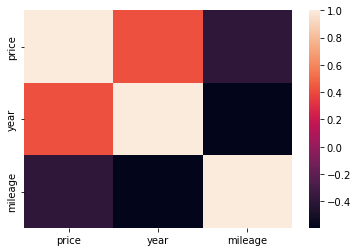

In [100]:
import seaborn as sns
sns.heatmap(correlation)

# <span>Prepare Dataset for Training: convert categories from text to numbers </span>

In [101]:
import scipy as sp
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



onehot = ColumnTransformer(transformers=[
    ('cat',OneHotEncoder(handle_unknown = 'ignore'),['brand','model','color','state'])
],remainder='passthrough')

linreg = LinearRegression()

pipe = Pipeline([
    ('onehot',onehot),
    ('linreg',linreg)
])



# <span >Splitting the Dataset in Train set and Test set</span>

In [105]:
X=cars[['brand','model','year','mileage','color','state']]
y=cars['price']



X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
y_test

1737    46900
2292     3500
2167    21500
1949    20600
957     16700
        ...  
553     13200
832     12500
875     25300
996     20800
1673    25300
Name: price, Length: 500, dtype: int64

# <span >Training Model with LinearRegressor.</span>

In [106]:

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_train)
y_test.iloc[:1]


1737    46900
Name: price, dtype: int64

# <span>Predict </span>

In [107]:
import pickle


prep=pipe.predict(pd.DataFrame(columns=['brand','model','year', 'mileage','color','state'],data=np.array(['toyota','toyota cruiser',2008, 274117.0,'black','new jersey']).reshape(1,6)))

print("The predicted value of a black 2008 Toyota cruiser in New jersey with  274117km is:",prep)

The predicted value of a black 2008 Toyota cruiser in New jersey with  274117km is: [6977.22913794]


# <span>Calculate the RMSE.</span>

In [108]:
from sklearn.metrics import mean_squared_error
import numpy as np

lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

6079.454453459542

# <span>Evaluate on the Test Set </span>

In [109]:
y_pred2 = pipe.predict(X_test)

from sklearn.metrics import mean_squared_error
import numpy as np

lin_mse = mean_squared_error(y_test, y_pred2)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

7502.755827299669

Now let's test by predicting the first row of the X test set

In [110]:
p=pipe.predict(pd.DataFrame(columns=['brand','model','year', 'mileage','color','state'],data=X_test.iloc[:1]))
print("The actual value:",y_test.iloc[:1].values)
print("The predicted value:",p)

The actual value: [46900]
The predicted value: [44265.23944986]


# <span >Comparing actual and predicted values.</span>


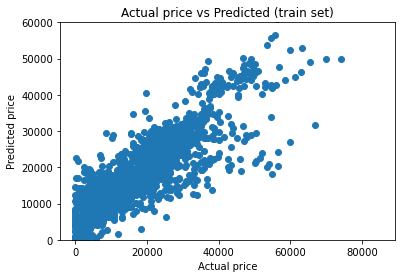

In [21]:
plot.scatter(y_train, y_pred)
plot.xlabel("Actual price")
plot.ylabel("Predicted price")
plot.title("Actual price vs Predicted (train set)")
plot.ylim([0,60000])
plot.show()

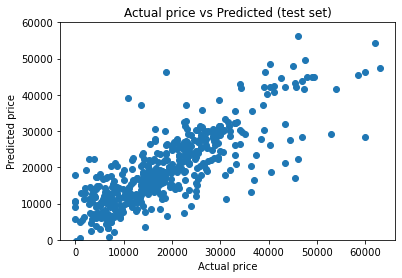

In [22]:
plot.scatter(y_test, y_pred2)
plot.xlabel("Actual price")
plot.ylabel("Predicted price")
plot.title("Actual price vs Predicted (test set)")
plot.ylim([0,60000])
plot.show()



# <span>Export </span>

In [36]:


pickle.dump(pipe,open('Model.pkl','wb'))
prep=pipe.predict(pd.DataFrame(columns=['brand','model','year', 'mileage','color','state'],data=np.array(['toyota','toyota cruiser',2008, 274117.0,'black','new jersey']).reshape(1,6)))
pickle.dump(pipe,open('pipe.pkl','wb'))